In [1]:
import pandas as pd

import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
def drop_constant_column(dataframe):
    """
    Drops constant value columns of pandas dataframe.
    """
    return dataframe.loc[:, (dataframe != dataframe.iloc[0]).any()]

In [22]:
go_explore = True
reward_type = 2
lawn_num = 22
run_id = 105

log_dir = "../PPO_logs"

sub_dir = 'go_explore_' + str(go_explore) + '/reward_function' + str(reward_type) + "/"

env_name = f"lawn{lawn_num}"

log_dir = log_dir + '/' + env_name + '/' + sub_dir




run_num = run_id


#### create new log file for each run
log_f_name = log_dir + '/' + str(run_num) + ".csv"''

In [23]:
run_df = pd.read_csv(log_f_name)

In [24]:
n_pca = None

if n_pca is not None:
    run_df = run_df.tail(n_pca)

In [25]:
paths = run_df['Path']


In [26]:


run_df = run_df[['Score', 'Fuel_Score', 'Grass_Score',
       'Num_Fuel_Obtained', 'Amt_Fuel_Obtained', 'End_Fuel', 'Frames', 'End_x',
       'End_y', 'Perc_done', 'Frames_Since_Fuel', 'Fuel_Manhattan', 'Momentum Lost']]

In [27]:
run_df = drop_constant_column(run_df)

In [28]:
run_df

,Score,Fuel_Score,Grass_Score,Num_Fuel_Obtained,Amt_Fuel_Obtained,Frames,End_x,End_y,Perc_done,Fuel_Manhattan,Momentum Lost
0,-1.705939,0.000000,29.406092,0,0.0,360,3,8,12.35,4,8
1,-1.906101,0.000000,9.389869,0,0.0,360,3,4,6.17,4,5
2,-1.861133,0.000000,13.886653,0,0.0,360,11,8,8.02,8,8
3,-1.570705,6.012821,36.916676,1,45.0,629,1,9,14.81,8,14
4,-1.891836,0.000000,10.816408,0,0.0,359,9,4,6.79,6,4
...,...,...,...,...,...,...,...,...,...,...,...
89916,7.934680,44.016872,949.451097,3,114.0,1032,4,22,84.57,15,51
89917,7.881697,43.798913,944.370833,3,119.0,1064,4,22,84.57,15,50
89918,5.056204,25.040987,680.579422,2,78.0,819,2,22,70.99,20,29
89919,-1.499112,3.669034,46.419755,1,28.0,528,6,12,17.28,9,21


In [29]:
scaler = StandardScaler()


In [30]:
scaled_df=run_df.copy()

In [31]:
scaled_df=pd.DataFrame(scaler.fit_transform(scaled_df), columns=scaled_df.columns)

In [32]:

#define PCA model to use
pca = PCA(n_components=10)

#fit PCA model to data
pca_fit = pca.fit(scaled_df)

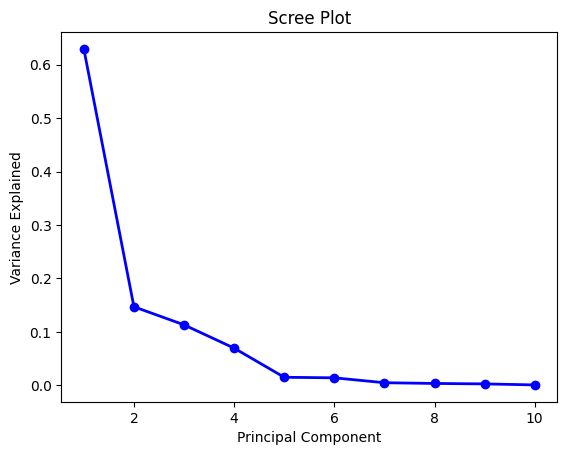

In [33]:
import matplotlib.pyplot as plt
PC_values = np.arange(pca.n_components_) + 1
plt.plot(PC_values, pca.explained_variance_ratio_, 'o-', linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

In [34]:
pca_fit.fit_transform(scaled_df)

array([[-4.77769635e+00,  1.42608942e+00, -1.76197491e+00, ...,
        -6.93994669e-02, -1.06577199e-01,  1.24359176e-01],
       [-5.26134655e+00,  1.86689855e+00, -1.81938623e+00, ...,
        -8.11866875e-02, -1.34306230e-01,  2.03659163e-01],
       [-5.00061042e+00,  7.72568038e-01,  2.17470752e-01, ...,
        -1.57711081e-01, -2.39610481e-01,  2.67656870e-01],
       ...,
       [ 2.76265211e+00, -5.59991166e-01, -4.09012160e-01, ...,
        -6.58068182e-02,  1.06939169e-01, -1.07649296e-03],
       [-2.98393222e+00,  1.41783931e+00, -3.44763858e-02, ...,
        -2.52572371e-01, -9.15688434e-02,  7.59283654e-02],
       [ 4.24729827e-01, -1.94977508e-01, -1.10171845e+00, ...,
         1.15951152e-01, -7.18508850e-02, -5.67436291e-02]])

In [35]:

pca_fit.components_.T.shape

(11, 10)

In [36]:
pcs = scaled_df.__matmul__(pca.components_.T)

In [37]:
idxs = []

for i in range(7):
    idxs.append(pcs[i].argmax())
    idxs.append(pcs[i].argmin())

In [38]:
run_df.iloc[idxs]

,Score,Fuel_Score,Grass_Score,Num_Fuel_Obtained,Amt_Fuel_Obtained,Frames,End_x,End_y,Perc_done,Fuel_Manhattan,Momentum Lost
1983,-0.660632,16.292482,117.644268,11,360.0,2518,1,22,31.48,18,48
44709,-1.966043,0.000000,3.395661,0,0.0,360,6,5,3.09,2,0
610,-1.532833,16.292482,30.424254,11,360.0,2519,4,5,14.20,6,44
4971,-0.045475,0.000000,195.452543,0,0.0,353,11,22,34.57,22,5
1026,-0.877978,11.912978,100.289201,10,324.0,2299,9,19,29.01,19,49
85485,6.839161,31.498249,852.417890,2,89.0,883,1,22,79.63,5,31
1983,-0.660632,16.292482,117.644268,11,360.0,2518,1,22,31.48,18,48
81563,5.795907,43.324664,736.265988,3,126.0,1108,11,12,74.07,12,43
66247,0.063000,9.554265,196.745703,4,150.0,1257,1,18,39.51,5,61
55941,-1.473904,33.102131,392.073406,2,103.0,971,1,4,51.85,16,22


In [74]:
paths = paths.iloc[idxs].reset_index(drop=True)

In [75]:
paths_list = paths.values.tolist()

In [76]:
path = paths_list[0].strip('][').split(', ')

In [77]:
path

['2',
 '2',
 '0',
 '1',
 '2',
 '2',
 '1',
 '2',
 '1',
 '2',
 '1',
 '1',
 '3',
 '3',
 '3',
 '0',
 '3',
 '1',
 '3',
 '3',
 '3',
 '0',
 '3',
 '1',
 '1',
 '3',
 '1',
 '1',
 '2',
 '2',
 '2',
 '2',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '3',
 '1',
 '1',
 '1',
 '1',
 '2',
 '2',
 '1',
 '2',
 '1',
 '2',
 '2',
 '2',
 '2',
 '1',
 '1',
 '1',
 '3',
 '1',
 '3',
 '3',
 '3',
 '1',
 '3',
 '3',
 '1',
 '1',
 '3',
 '3',
 '1',
 '3',
 '3',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '3',
 '0',
 '2',
 '2',
 '0',
 '0',
 '3',
 '2',
 '2',
 '0',
 '2',
 '0',
 '0',
 '0',
 '2',
 '0',
 '2',
 '0',
 '0',
 '2',
 '0',
 '2',
 '2',
 '0',
 '3',
 '3',
 '0',
 '2',
 '2',
 '1',
 '3',
 '3',
 '3',
 '3',
 '3',
 '1',
 '3',
 '0',
 '0',
 '2',
 '2',
 '1',
 '3',
 '3',
 '1',
 '3',
 '1',
 '3',
 '0',
 '2',
 '1',
 '2',
 '2',
 '2',
 '1',
 '3',
 '1',
 '2',
 '0',
 '1',
 '3',
 '1',
 '2',
 '2',
 '2',
 '2',
 '2',
 '0',
 '2',
 '1',
 '3',
 '2',
 '3',
 '2',
 '1',
 '2',
 '1',
 '3',
 '1',
 '3',
 '2',
 '2',
 '1',
 '3',
 '3',
 '3',
 '3',
 '1'

In [78]:
go_paths = []

for path_ in paths_list:
    path = path_.strip('][').split(', ')
    path = list(map(int,path))
    path_length = len(path)
    end_idx = int(np.random.triangular(left = int(0.1*path_length),
                                   right = int(0.9*path_length),
                                   mode = int(0.7*path_length)))
    go_paths.append(path[:end_idx])